In [48]:
# https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook
import pandas as pd
import spacy
from time import time
import re
from collections import defaultdict  # For word frequency


In [2]:
df=pd.read_csv("1_developer_17_06_2022 08_07_28")
df.shape

(15, 2)

In [3]:
df.head()

,Unnamed: 0,data
0,0,"Hi,\nHope you are doing great.\nThis is Ashwan..."
1,1,Roles & Responsibilities\nWrite and optimize S...
2,2,Mid-level .Net Developer\nWe are looking for a...
3,3,"Computer Information Systems, Inc. (CIS) is a ..."
4,4,Junior Developer at Bay Area's Fastest-Growing...


In [4]:
df.isnull().sum()

Unnamed: 0    0
data          0
dtype: int64

In [11]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

In [12]:
def cleaning(doc):
    txt = [token.lemma_ for token in doc if not token.is_stop]
    if len(txt) > 2:
        return ' '.join(txt)

In [32]:
brief_cleaning = (row.lower() for row in df['data'])
brief_cleaning

<generator object <genexpr> at 0x000001C3C5D1B0B0>

In [33]:
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

In [41]:
# from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [57]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


df['Text_After_Clean'] = df['data'].apply(normalize, lowercase=True, remove_stopwords=True)
df['Text_After_Clean']

0     hello , hope great . ashwani veridian please g...
1     role & responsibility write optimize sql state...
2     mid - level .net developer look mid - level .n...
3     computer information system , inc . ( cis ) le...
4     junior developer bay area fast - grow startup ...
5     jr . c # software developer write c # .net cus...
6     job responsibility : bachelor degree software ...
7     look web developer knowledge experience develo...
8     relevant experience : 3 - 5 + year job descrip...
9     team ethos group team consist member work coop...
10    look full - stack motivate application develop...
11    -PRON- look remote junior javascript developer...
12    job description experience code use java , c++...
13    look java developer experience build high - pe...
14    web service : rest soap implement use nodejs e...
Name: Text_After_Clean, dtype: object

In [58]:
from gensim.models.phrases import Phrases, Phraser


In [162]:
sent = [row.split() for row in df['Text_After_Clean']]
sent
arr = []
for i in sent:
    i_arr = []
    for j in i:
        if j not in ['.',',',':','(',')','-',"’",'/','%','$','"', '&', '+', '?']:
#             print(j)
            i_arr.append(j)
    arr.append(i_arr)
    
sent = arr

In [163]:
phrases = Phrases(sent, min_count=30, progress_per=10000)


collecting all words and their counts
PROGRESS: at sentence #0, processed 0 words and 0 word types
collected 3344 token types (unigram + bigrams) from a corpus of 3065 words and 15 sentences
merged Phrases<3344 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
Phrases lifecycle event {'msg': 'built Phrases<3344 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.01s', 'datetime': '2022-06-17T08:59:46.452331', 'gensim': '4.2.0', 'python': '3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [164]:
bigram = Phraser(phrases)

sentences = bigram[sent]


exporting phrases from Phrases<3344 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<0 phrases, min_count=30, threshold=10.0> from Phrases<3344 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.01s', 'datetime': '2022-06-17T08:59:46.758536', 'gensim': '4.2.0', 'python': '3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [165]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)


953

In [166]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]
word_freq

defaultdict(int,
            {'hello': 1,
             'hope': 1,
             'great': 4,
             'ashwani': 2,
             'veridian': 1,
             'please': 4,
             'go': 3,
             'job': 28,
             'description': 4,
             'let': 2,
             'know': 2,
             'interest': 1,
             'reply': 1,
             'update': 7,
             'resume': 1,
             'expect': 1,
             'rate': 1,
             'compensation': 1,
             'feel': 4,
             'free': 1,
             'contact': 1,
             '832': 2,
             '391': 2,
             '5796': 2,
             'much': 6,
             'information': 5,
             'role': 10,
             'java': 16,
             'developer': 17,
             'location': 16,
             'remote': 24,
             'duration': 1,
             'full': 21,
             'time': 32,
             'experience': 77,
             'j2ee': 1,
             'technology': 10,
             'res

In [167]:
import multiprocessing

from gensim.models import Word2Vec


In [168]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
# help(Word2Vec)

In [197]:
w2v_model = Word2Vec(min_count=3,
                     window=5,
                     max_vocab_size=1000,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)


Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.03>', 'datetime': '2022-06-17T09:11:39.169588', 'gensim': '4.2.0', 'python': '3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [198]:
w2v_model.build_vocab(sentences, progress_per=10000)

collecting all words and their counts
PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
collected 953 word types from a corpus of 3065 raw words and 15 sentences
Creating a fresh vocabulary
Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 290 unique words (30.43% of original 953, drops 663)', 'datetime': '2022-06-17T09:11:39.553547', 'gensim': '4.2.0', 'python': '3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 2242 word corpus (73.15% of original 3065, drops 823)', 'datetime': '2022-06-17T09:11:39.553547', 'gensim': '4.2.0', 'python': '3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
deleting the raw counts dictionary of 953 items
sample=6e-05 downsamples 290 most-common words
Word2Vec lifecycle ev

In [199]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)


Word2Vec lifecycle event {'msg': 'training model with 7 workers on 290 vocabulary and 100 features, using sg=0 hs=0 sample=6e-05 negative=20 window=5 shrink_windows=True', 'datetime': '2022-06-17T09:11:39.841749', 'gensim': '4.2.0', 'python': '3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'train'}
EPOCH 0: training on 3065 raw words (288 effective words) took 0.0s, 117652 effective words/s
EPOCH 1: training on 3065 raw words (325 effective words) took 0.0s, 144137 effective words/s
EPOCH 2: training on 3065 raw words (283 effective words) took 0.0s, 119667 effective words/s
EPOCH 3: training on 3065 raw words (301 effective words) took 0.0s, 148899 effective words/s
EPOCH 4: training on 3065 raw words (335 effective words) took 0.0s, 132805 effective words/s
EPOCH 5: training on 3065 raw words (318 effective words) took 0.0s, 161561 effective words/s
EPOCH 6: training on 3065 raw words (283 effective w

(9323, 91950)

In [200]:
w2v_model.init_sims(replace=True)


C:\Users\lucas\AppData\Local\Temp/ipykernel_24232/2897808894.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)
destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


In [201]:
# w2v_model.wv.most_similar(positive=["java"])
w2v_model.wv.similarity("java", "c")

0.9995574

In [202]:
# help(w2v_model)
w2v_model.corpus_count

15

In [203]:
sentences

In [204]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [205]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))


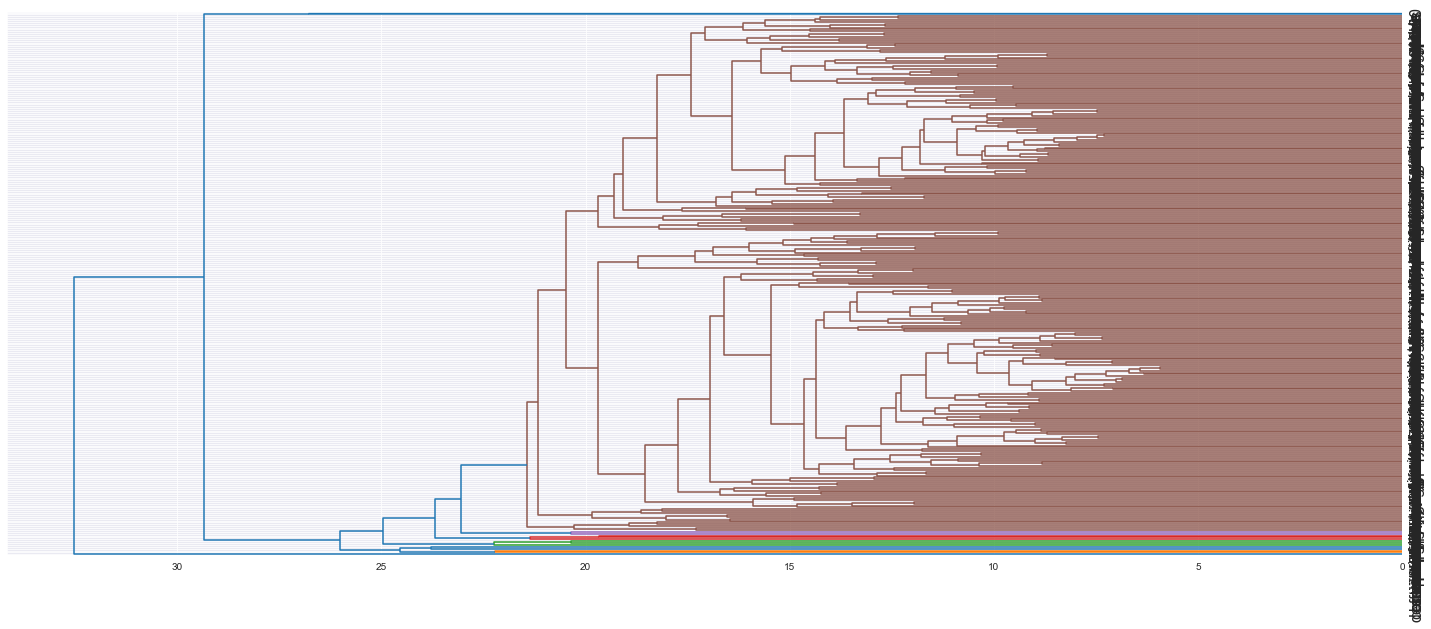

In [206]:
from scipy.cluster.hierarchy import dendrogram, linkage
l = linkage(w2v_model.wv.vectors, method='complete', metric='seuclidean')

plt.figure(figsize=(25,10))
dendrogram(
    l,
    leaf_rotation=90.,
    leaf_font_size=16.,
    orientation='left',
    leaf_label_func=lambda v: str(w2v_model.wv.index_to_key[v])
)
plt.show()